In [3]:
import numpy as np
import matplotlib.pyplot as plt

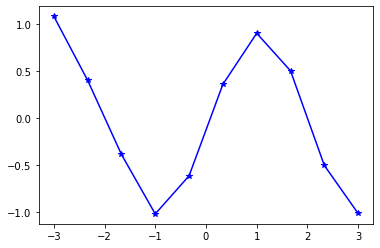

In [4]:
N = 10
x = np.linspace(-3,3,N)
t = np.random.randn(x.size)*0.1
y = np.sin(np.pi*x/2) + t
y = y.reshape(-1,1)
X = np.c_[x,t]
plt.plot(x,y,"*-b")

In [5]:
nodes = (3,2,1)
n_features = X.shape[1]
n_layers = len(nodes)
alpha = .1
weights = []
bias = []

weights.append(np.random.random((n_features,nodes[0])))
weights.append(np.random.random((nodes[0],nodes[1])))
weights.append(np.random.random((nodes[1],nodes[2])))

bias.append(np.random.random(nodes[0]))
bias.append(np.random.random(nodes[1]))
bias.append(np.random.random(nodes[2]))


In [6]:
A = []
Z = []

z = np.dot(X,weights[0]) + bias[0]
Z.append(z)
a = 1 / (1 + np.exp(-z))
A.append(a)

z = np.dot(a,weights[1]) + bias[1]
Z.append(z)
a = 1 / (1 + np.exp(-z))
A.append(a)

z = np.dot(a,weights[2]) + bias[2]
Z.append(z)
a = z
A.append(a)

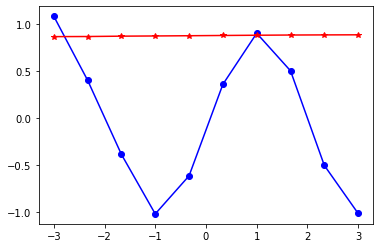

In [7]:
plt.plot(x,y,"o-b")
plt.plot(x,a,"*-r")

In [8]:
delta = [[]]*n_layers
dWeight = [[]]*n_layers
dBias = [[]]*n_layers

delta[-1] = (a-y)*1
dWeight[-1] = np.dot(delta[-1].transpose(),A[-2]).transpose() / N
dBias[-1] = delta[-1].mean(axis = 0)


delta[-2] = np.dot(delta[-1],weights[-1].transpose())*(A[-2]*(1-A[-2]))
dWeight[-2] = np.dot(delta[-2].transpose(),A[-3]).transpose()/N
dBias[-2] = delta[-2].mean(axis = 0)


delta[-3] = np.dot(delta[-2],weights[-2].transpose())*(A[-3]*(1-A[-3]))
dWeight[-3] = np.dot(delta[-3].transpose(),X).transpose()/N
dBias[-3] = delta[-3].mean(axis = 0)


In [9]:
weights[0] = weights[0] - alpha * dWeight[0]
weights[1] = weights[1] - alpha * dWeight[1] 
weights[2] = weights[2] - alpha * dWeight[2] 

bias[0] = bias[0] - alpha*dBias[0]
bias[1] = bias[1] - alpha*dBias[1]
bias[2] = bias[2] - alpha*dBias[2]

In [199]:
nodes = (5,5,1)
n_features = X.shape[1]
n_layers = len(nodes)
alpha = .3
weights = []
bias = []
weights.append(np.random.random((n_features,nodes[0])))
weights.append(np.random.random((nodes[0],nodes[1])))
weights.append(np.random.random((nodes[1],nodes[2])))

bias.append(np.random.random(nodes[0]))
bias.append(np.random.random(nodes[1]))
bias.append(np.random.random(nodes[2]))

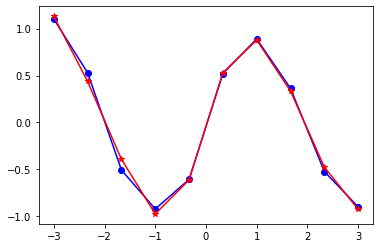

In [250]:

for i in range(100):
    A = []
    Z = []

    z = np.dot(X,weights[0]) + bias[0]
    Z.append(z)
    a = 1 / (1 + np.exp(-z))
    A.append(a)

    z = np.dot(a,weights[1]) + bias[1]
    Z.append(z)
    a = 1 / (1 + np.exp(-z))
    A.append(a)

    z = np.dot(a,weights[2]) + bias[2]
    Z.append(z)
    a = z
    A.append(a)

    delta = [[]]*n_layers
    dWeight = [[]]*n_layers
    dBias = [[]]*n_layers

    delta[-1] = (a-y)*1
    dWeight[-1] = np.dot(delta[-1].transpose(),A[-2]).transpose() / N
    dBias[-1] = delta[-1].mean(axis = 0)


    delta[-2] = np.dot(delta[-1],weights[-1].transpose())*((1-A[-2])*A[-2])
    dWeight[-2] = np.dot(delta[-2].transpose(),A[-3]).transpose()/N
    dBias[-2] = delta[-2].mean(axis = 0)


    delta[-3] = np.dot(delta[-2],weights[-2].transpose())*((1-A[-3])*A[-3])
    dWeight[-3] = np.dot(delta[-3].transpose(),X).transpose()/N
    dBias[-3] = delta[-3].mean(axis = 0)

    weights[0] = weights[0] - alpha * dWeight[0]
    weights[1] = weights[1] - alpha * dWeight[1] 
    weights[2] = weights[2] - alpha * dWeight[2] 

    bias[0] = bias[0] - alpha*dBias[0]
    bias[1] = bias[1] - alpha*dBias[1]
    bias[2] = bias[2] - alpha*dBias[2]
plt.plot(x,y,"o-b")
plt.plot(x,a,"*-r")